## 1️⃣ Kütüphaneler ve Veri Yükleme

In [1]:
# Kütüphaneler
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
import ast
import warnings
from itertools import combinations

warnings.filterwarnings('ignore')

# Plotly için default tema (açık)
import plotly.io as pio
pio.templates.default = 'plotly_white'

print("✅ Kütüphaneler yüklendi!")

✅ Kütüphaneler yüklendi!


In [2]:
# Veri yükleme
df = pd.read_csv('data_science_job_posts_2025.csv')
print(f"📊 Veri seti yüklendi: {df.shape[0]} satır, {df.shape[1]} sütun")

📊 Veri seti yüklendi: 944 satır, 13 sütun


In [3]:
# Yardımcı fonksiyonlar
def parse_salary(salary_str):
    """Maaş değerini sayısala çevir"""
    if pd.isna(salary_str) or salary_str == '':
        return np.nan
    salary_str = str(salary_str).replace('€', '').replace(',', '')
    if ' - ' in salary_str:
        try:
            parts = salary_str.split(' - ')
            return (float(parts[0].strip()) + float(parts[1].strip())) / 2
        except:
            return np.nan
    try:
        return float(salary_str.strip())
    except:
        return np.nan

def parse_skills(skills_str):
    """Skills listesini parse et"""
    if pd.isna(skills_str) or skills_str == '[]':
        return []
    try:
        return ast.literal_eval(skills_str)
    except:
        return []

def parse_company_size(size_str):
    """Şirket büyüklüğünü sayısala çevir"""
    if pd.isna(size_str):
        return np.nan
    size_str = str(size_str).replace(',', '').replace('€', '').strip()
    try:
        return float(size_str)
    except:
        return np.nan

print("✅ Yardımcı fonksiyonlar tanımlandı!")

✅ Yardımcı fonksiyonlar tanımlandı!


In [4]:
# Veri ön işleme
df['salary_numeric'] = df['salary'].apply(parse_salary)
df['company_size_numeric'] = df['company_size'].apply(parse_company_size)
df['skills_list'] = df['skills'].apply(parse_skills)
df['skills_count'] = df['skills_list'].apply(len)

print("✅ Veri ön işleme tamamlandı!")
print(f"\n📋 Yeni sütunlar: salary_numeric, company_size_numeric, skills_list, skills_count")

✅ Veri ön işleme tamamlandı!

📋 Yeni sütunlar: salary_numeric, company_size_numeric, skills_list, skills_count


In [5]:
# Veri setinin ilk bakışı
print("📊 Veri Seti Özeti:")
print(f"   • Toplam İlan: {df.shape[0]:,}")
print(f"   • Özellik Sayısı: {df.shape[1]}")
print(f"   • Ortalama Maaş: €{df['salary_numeric'].mean():,.0f}")
print(f"   • Şirket Sayısı: {df['company'].nunique()}")
print(f"\n🔍 İlk 5 Satır:")
df.head()

📊 Veri Seti Özeti:
   • Toplam İlan: 944
   • Özellik Sayısı: 17
   • Ortalama Maaş: €131,780
   • Şirket Sayısı: 420

🔍 İlk 5 Satır:


,job_title,seniority_level,status,company,location,post_date,headquarter,industry,ownership,company_size,revenue,salary,skills,salary_numeric,company_size_numeric,skills_list,skills_count
0,data scientist,senior,hybrid,company_003,"Grapevine, TX . Hybrid",17 days ago,"Bentonville, AR, US",Retail,Public,€352.44B,Public,"€100,472 - €200,938","['spark', 'r', 'python', 'scala', 'machine lea...",150705.0,NaN,"[spark, r, python, scala, machine learning, te...",6
1,data scientist,lead,hybrid,company_005,"Fort Worth, TX . Hybrid",15 days ago,"Detroit, MI, US",Manufacturing,Public,"155,030",€51.10B,"€118,733","['spark', 'r', 'python', 'sql', 'machine learn...",118733.0,155030.0,"[spark, r, python, sql, machine learning]",5
2,data scientist,senior,on-site,company_007,"Austin, TX . Toronto, Ontario, Canada . Kirkla...",a month ago,"Redwood City, CA, US",Technology,Public,"25,930",€33.80B,"€94,987 - €159,559","['aws', 'git', 'python', 'docker', 'sql', 'mac...",127273.0,25930.0,"[aws, git, python, docker, sql, machine learni...",9
3,data scientist,senior,hybrid,company_008,"Chicago, IL . Scottsdale, AZ . Austin, TX . Hy...",8 days ago,"San Jose, CA, US",Technology,Public,"34,690",€81.71B,"€112,797 - €194,402","['sql', 'r', 'python']",153599.5,34690.0,"[sql, r, python]",3
4,data scientist,NaN,on-site,company_009,On-site,3 days ago,"Stamford, CT, US",Finance,Private,"1,800",Private,"€114,172 - €228,337",[],171254.5,1800.0,[],0


In [6]:
# Sütun bilgileri
print("📋 Sütun Bilgileri:")
df.info()

📋 Sütun Bilgileri:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   job_title             941 non-null    object 
 1   seniority_level       884 non-null    object 
 2   status                688 non-null    object 
 3   company               944 non-null    object 
 4   location              942 non-null    object 
 5   post_date             944 non-null    object 
 6   headquarter           944 non-null    object 
 7   industry              944 non-null    object 
 8   ownership             897 non-null    object 
 9   company_size          944 non-null    object 
 10  revenue               929 non-null    object 
 11  salary                944 non-null    object 
 12  skills                944 non-null    object 
 13  salary_numeric        944 non-null    float64
 14  company_size_numeric  905 non-null    float64
 15  skil

## 2️⃣ Eksik Değer Analizi

In [7]:
# Eksik değer hesaplama
original_cols = [col for col in df.columns if col not in ['salary_numeric', 'company_size_numeric', 'skills_list', 'skills_count']]
missing_data = []

for col in original_cols:
    null_count = df[col].isnull().sum()
    empty_count = (df[col] == '').sum() if df[col].dtype == 'object' else 0
    total_missing = null_count + empty_count
    missing_data.append({
        'Sütun': col,
        'Eksik Sayı': total_missing,
        'Oran (%)': round(total_missing / len(df) * 100, 2)
    })

missing_df = pd.DataFrame(missing_data).sort_values('Eksik Sayı', ascending=False)
print("📋 Eksik Değer Tablosu:")
missing_df

📋 Eksik Değer Tablosu:


,Sütun,Eksik Sayı,Oran (%)
2,status,256,27.12
1,seniority_level,60,6.36
8,ownership,47,4.98
10,revenue,15,1.59
0,job_title,3,0.32
4,location,2,0.21
3,company,0,0.00
5,post_date,0,0.00
6,headquarter,0,0.00
7,industry,0,0.00


In [8]:
# Eksik değer grafiği
missing_filtered = missing_df[missing_df['Eksik Sayı'] > 0]

if len(missing_filtered) > 0:
    fig_missing = px.bar(
        missing_filtered,
        x='Sütun',
        y='Eksik Sayı',
        color='Oran (%)',
        title='<b>Sütunlara Göre Eksik Değer Dağılımı</b>',
        color_continuous_scale='Reds',
        height=450
    )
    fig_missing.update_layout(
        title_font=dict(size=18, color='#00d4ff'),
        xaxis_tickangle=-45
    )
    fig_missing.show()
else:
    print("✅ Veri setinde eksik değer bulunmamaktadır!")

## 3️⃣ Aykırı Değer Analizi

IQR (Interquartile Range) yöntemi kullanılarak aykırı değerler tespit edilecektir.

In [9]:
# Aykırı değer tespit fonksiyonu
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers, lower_bound, upper_bound, Q1, Q3, IQR

# Maaş için aykırı değer analizi
salary_clean = df['salary_numeric'].dropna()
outliers_salary, lb_salary, ub_salary, q1_salary, q3_salary, iqr_salary = detect_outliers_iqr(salary_clean)

# Şirket büyüklüğü için aykırı değer analizi
company_size_clean = df['company_size_numeric'].dropna()
outliers_size, lb_size, ub_size, q1_size, q3_size, iqr_size = detect_outliers_iqr(company_size_clean)

# Beceri sayısı için aykırı değer analizi
skills_count_data = df['skills_count'].dropna()
outliers_skills, lb_skills, ub_skills, q1_skills, q3_skills, iqr_skills = detect_outliers_iqr(skills_count_data)

# Aykırı değer istatistikleri
print("📊 Aykırı Değer İstatistikleri:")
outlier_stats = pd.DataFrame({
    'Metrik': ['Q1 (25%)', 'Q3 (75%)', 'IQR', 'Alt Sınır', 'Üst Sınır', 'Aykırı Değer Sayısı', 'Aykırı Oran (%)'],
    'Maaş (€)': [f"{q1_salary:,.0f}", f"{q3_salary:,.0f}", f"{iqr_salary:,.0f}", f"{lb_salary:,.0f}", 
                 f"{ub_salary:,.0f}", f"{len(outliers_salary)}", f"{len(outliers_salary)/len(salary_clean)*100:.1f}%"],
    'Şirket Büyüklüğü': [f"{q1_size:,.0f}", f"{q3_size:,.0f}", f"{iqr_size:,.0f}", f"{lb_size:,.0f}",
                        f"{ub_size:,.0f}", f"{len(outliers_size)}", f"{len(outliers_size)/len(company_size_clean)*100:.1f}%"],
    'Beceri Sayısı': [f"{q1_skills:.0f}", f"{q3_skills:.0f}", f"{iqr_skills:.0f}", f"{lb_skills:.0f}",
                     f"{ub_skills:.0f}", f"{len(outliers_skills)}", f"{len(outliers_skills)/len(skills_count_data)*100:.1f}%"]
})
outlier_stats

📊 Aykırı Değer İstatistikleri:


,Metrik,Maaş (€),Şirket Büyüklüğü,Beceri Sayısı
0,Q1 (25%),"76,372","1,530",1
1,Q3 (75%),"169,733","94,570",7
2,IQR,"93,361","93,040",6
3,Alt Sınır,"-63,670","-138,030",-8
4,Üst Sınır,"309,775","234,130",16
5,Aykırı Değer Sayısı,3,143,3
6,Aykırı Oran (%),0.3%,15.8%,0.3%


In [10]:
# Maaş - Aykırı Değer Öncesi vs Sonrası Boxplot
from plotly.subplots import make_subplots

salary_no_outliers = salary_clean[(salary_clean >= lb_salary) & (salary_clean <= ub_salary)]

fig = make_subplots(rows=1, cols=2, subplot_titles=('🟥 Aykırı Değerler DAHİL', '🟦 Aykırı Değerler HARİÇ'))

fig.add_trace(go.Box(y=salary_clean, name='Önce', marker_color='#ff6b6b', boxpoints='outliers'), row=1, col=1)
fig.add_trace(go.Box(y=salary_no_outliers, name='Sonra', marker_color='#00d4ff', boxpoints='outliers'), row=1, col=2)

fig.update_layout(
    title='<b>Maaş Dağılımı: Aykırı Değer Öncesi vs Sonrası</b>',
    title_font=dict(size=18, color='#00d4ff'),
    height=450,
    showlegend=False
)
fig.show()

print(f"\n📊 Maaş Özeti:")
print(f"   • Önce: {len(salary_clean):,} kayıt | Min: €{salary_clean.min():,.0f} | Max: €{salary_clean.max():,.0f}")
print(f"   • Sonra: {len(salary_no_outliers):,} kayıt | Min: €{salary_no_outliers.min():,.0f} | Max: €{salary_no_outliers.max():,.0f}")
print(f"   • Silinen: {len(salary_clean) - len(salary_no_outliers)} aykırı değer")


📊 Maaş Özeti:
   • Önce: 944 kayıt | Min: €7,055 | Max: €2,739,979
   • Sonra: 941 kayıt | Min: €7,055 | Max: €306,626
   • Silinen: 3 aykırı değer


In [11]:
# Maaş Histogram Karşılaştırması
fig = make_subplots(rows=1, cols=2, subplot_titles=('🟥 Histogram (Önce)', '🟦 Histogram (Sonra)'))

fig.add_trace(go.Histogram(x=salary_clean, nbinsx=50, marker_color='#ff6b6b', name='Önce'), row=1, col=1)
fig.add_trace(go.Histogram(x=salary_no_outliers, nbinsx=50, marker_color='#00d4ff', name='Sonra'), row=1, col=2)

fig.update_layout(
    title='<b>Maaş Histogramı: Aykırı Değer Öncesi vs Sonrası</b>',
    title_font=dict(size=18, color='#00d4ff'),
    height=400,
    showlegend=False
)
fig.show()

## 4️⃣ Betimsel İstatistikler

In [12]:
# Sayısal değişkenler istatistikleri
print("🔢 Sayısal Değişkenler İstatistikleri:")
numeric_stats = pd.DataFrame({
    'İstatistik': ['Ortalama', 'Medyan', 'Std Sapma', 'Min', 'Max', 'Geçerli Değer'],
    'Maaş (€)': [
        f"{df['salary_numeric'].mean():,.0f}",
        f"{df['salary_numeric'].median():,.0f}",
        f"{df['salary_numeric'].std():,.0f}",
        f"{df['salary_numeric'].min():,.0f}",
        f"{df['salary_numeric'].max():,.0f}",
        f"{df['salary_numeric'].notna().sum():,}"
    ],
    'Şirket Büyüklüğü': [
        f"{df['company_size_numeric'].mean():,.0f}" if df['company_size_numeric'].notna().any() else "N/A",
        f"{df['company_size_numeric'].median():,.0f}" if df['company_size_numeric'].notna().any() else "N/A",
        f"{df['company_size_numeric'].std():,.0f}" if df['company_size_numeric'].notna().any() else "N/A",
        f"{df['company_size_numeric'].min():,.0f}" if df['company_size_numeric'].notna().any() else "N/A",
        f"{df['company_size_numeric'].max():,.0f}" if df['company_size_numeric'].notna().any() else "N/A",
        f"{df['company_size_numeric'].notna().sum():,}"
    ],
    'Beceri Sayısı': [
        f"{df['skills_count'].mean():.1f}",
        f"{df['skills_count'].median():.0f}",
        f"{df['skills_count'].std():.1f}",
        f"{df['skills_count'].min()}",
        f"{df['skills_count'].max()}",
        f"{len(df):,}"
    ]
})
numeric_stats

🔢 Sayısal Değişkenler İstatistikleri:


,İstatistik,Maaş (€),Şirket Büyüklüğü,Beceri Sayısı
0,Ortalama,"131,780","97,290",4.4
1,Medyan,"134,724","20,030",4
2,Std Sapma,"128,814","184,697",3.6
3,Min,"7,055",5,0
4,Max,"2,739,979","865,476",17
5,Geçerli Değer,944,905,944


In [13]:
# Kategorik değişken dağılımları
print("📝 Kategorik Değişken Dağılımları:\n")

print("📌 İş Pozisyonları (Top 5):")
display(df['job_title'].value_counts().head(5).to_frame('Sayı'))

print("\n📌 Kıdem Seviyeleri:")
seniority_data = df[df['seniority_level'].notna() & (df['seniority_level'] != '')]['seniority_level'].value_counts()
display(seniority_data.to_frame('Sayı'))

print("\n📌 Çalışma Modeli:")
status_data = df[df['status'].notna() & (df['status'] != '')]['status'].value_counts()
display(status_data.to_frame('Sayı'))

📝 Kategorik Değişken Dağılımları:

📌 İş Pozisyonları (Top 5):


,Sayı
job_title,
data scientist,856
machine learning engineer,80
data engineer,4
data analyst,1



📌 Kıdem Seviyeleri:


,Sayı
seniority_level,
senior,630
lead,116
midlevel,113
junior,25



📌 Çalışma Modeli:


,Sayı
status,
on-site,363
hybrid,207
remote,118


## 5️⃣ Dağılım Grafikleri

In [14]:
# Kıdem Seviyesi Dağılımı
seniority_valid = df[df['seniority_level'].notna() & (df['seniority_level'] != '')]
seniority_counts = seniority_valid['seniority_level'].value_counts().reset_index()
seniority_counts.columns = ['Kıdem', 'Sayı']

fig_seniority = px.bar(
    seniority_counts,
    x='Kıdem',
    y='Sayı',
    title='<b>👔 Kıdem Seviyesi Dağılımı</b>',
    height=400
)
fig_seniority.update_traces(marker_color='#00d4ff')
fig_seniority.update_layout(title_font=dict(size=18, color='#00d4ff'))
fig_seniority.show()

In [15]:
# Çalışma Modeli Dağılımı
status_valid = df[df['status'].notna() & (df['status'] != '')]
status_counts = status_valid['status'].value_counts().reset_index()
status_counts.columns = ['Model', 'Sayı']

fig_status = px.bar(
    status_counts,
    x='Model',
    y='Sayı',
    title='<b>🏢 Çalışma Modeli Dağılımı</b>',
    height=400
)
fig_status.update_traces(marker_color='#00d4ff')
fig_status.update_layout(title_font=dict(size=18, color='#00d4ff'))
fig_status.show()

In [16]:
# Çalışma Modeli Pie Chart
fig_pie = px.pie(
    status_counts,
    values='Sayı',
    names='Model',
    title='<b>🥧 Remote / Hybrid / On-site Oranları</b>',
    color_discrete_sequence=px.colors.qualitative.Set3,
    hole=0.4
)
fig_pie.update_layout(title_font=dict(size=18, color='#00d4ff'))
fig_pie.update_traces(textposition='inside', textinfo='percent+label')
fig_pie.show()

In [17]:
# Sektör Dağılımı (Top 15)
industry_counts = df['industry'].value_counts().head(15).reset_index()
industry_counts.columns = ['Sektör', 'Sayı']

fig_industry = px.bar(
    industry_counts,
    y='Sektör',
    x='Sayı',
    orientation='h',
    title='<b>🏭 Sektör Dağılımı (Top 15)</b>',
    height=450
)
fig_industry.update_traces(marker_color='#00d4ff')
fig_industry.update_layout(
    title_font=dict(size=18, color='#00d4ff'),
    yaxis={'categoryorder': 'total ascending'}
)
fig_industry.show()

## 6️⃣ Korelasyon ve Maaş Analizi

In [18]:
# Korelasyon Heatmap
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

if len(numeric_cols) >= 2:
    corr_matrix = df[numeric_cols].corr()
    
    fig = px.imshow(
        corr_matrix,
        text_auto='.2f',
        color_continuous_scale='Blues',
        title="📊 Sayısal Değişkenler Arası Korelasyon",
        labels=dict(color="Korelasyon")
    )
    fig.update_layout(height=500)
    fig.show()
else:
    print("Korelasyon için yeterli sayısal değişken yok.")

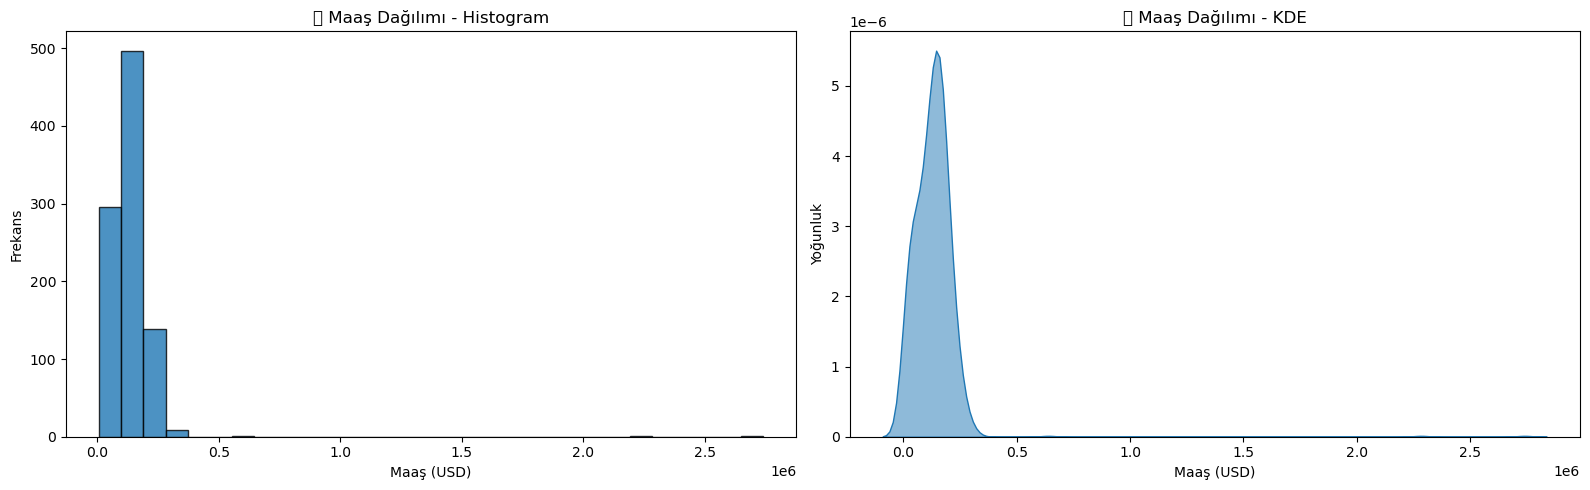

In [19]:
# Maaş Dağılımı - Histogram ve KDE
if 'salary_numeric' in df.columns and df['salary_numeric'].notna().sum() > 0:
    salary_data = df['salary_numeric'].dropna()
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 5))
    
    # Histogram
    axes[0].hist(salary_data, bins=30, color='#1f77b4', edgecolor='black', alpha=0.8)
    axes[0].set_title("💰 Maaş Dağılımı - Histogram", fontsize=12)
    axes[0].set_xlabel("Maaş (USD)")
    axes[0].set_ylabel("Frekans")
    
    # KDE
    sns.kdeplot(data=salary_data, ax=axes[1], color='#1f77b4', fill=True, alpha=0.5)
    axes[1].set_title("📈 Maaş Dağılımı - KDE", fontsize=12)
    axes[1].set_xlabel("Maaş (USD)")
    axes[1].set_ylabel("Yoğunluk")
    
    plt.tight_layout()
    plt.show()
else:
    print("Maaş verisi bulunamadı.")

## 7️⃣ Sektör ve Şirket Analizleri

In [20]:
# Sektöre Göre Ortalama Maaş
if 'industry' in df.columns and 'salary_numeric' in df.columns:
    industry_salary = df.groupby('industry')['salary_numeric'].mean().dropna().sort_values(ascending=False).head(15)
    
    if len(industry_salary) > 0:
        fig = px.bar(
            x=industry_salary.values,
            y=industry_salary.index,
            orientation='h',
            title="💼 Sektöre Göre Ortalama Maaş (Top 15)",
            labels={'x': 'Ortalama Maaş (USD)', 'y': 'Sektör'}
        )
        fig.update_traces(marker_color='#1f77b4')
        fig.update_layout(height=500, yaxis=dict(autorange="reversed"))
        fig.show()
    else:
        print("Sektör-maaş verisi bulunamadı.")
else:
    print("İlgili sütunlar mevcut değil.")

In [21]:
# Şirket Büyüklüğü - Maaş İlişkisi (Scatter Plot)
if 'company_size_numeric' in df.columns and 'salary_numeric' in df.columns:
    valid_data = df[['company_size_numeric', 'salary_numeric']].dropna()
    
    if len(valid_data) > 0:
        fig = px.scatter(
            valid_data,
            x='company_size_numeric',
            y='salary_numeric',
            title="🏢 Şirket Büyüklüğü - Maaş İlişkisi",
            labels={'company_size_numeric': 'Şirket Büyüklüğü (Çalışan Sayısı)', 'salary_numeric': 'Maaş (USD)'},
            trendline="ols"
        )
        fig.update_traces(marker=dict(color='#1f77b4', size=8, opacity=0.7))
        fig.update_layout(height=500)
        fig.show()
    else:
        print("Geçerli veri bulunamadı.")
else:
    print("İlgili sütunlar mevcut değil.")

In [22]:
# Lokasyona Göre İş İlanı Sayısı
if 'headquarter' in df.columns:
    location_counts = df['headquarter'].value_counts().head(15)
    
    fig = px.bar(
        x=location_counts.values,
        y=location_counts.index,
        orientation='h',
        title="📍 Lokasyona Göre İş İlanı Sayısı (Top 15)",
        labels={'x': 'İlan Sayısı', 'y': 'Lokasyon'}
    )
    fig.update_traces(marker_color='#1f77b4')
    fig.update_layout(height=500, yaxis=dict(autorange="reversed"))
    fig.show()
else:
    print("Lokasyon sütunu mevcut değil.")

In [23]:
# Lokasyon Detayları Tablosu
print("📊 LOKASYON DETAYLARI")
print("=" * 70)

if 'headquarter' in df.columns:
    hq_data = df.groupby('headquarter').agg({
        'salary_numeric': 'mean',
        'job_title': 'count'
    }).reset_index()
    hq_data.columns = ['Lokasyon', 'Ortalama Maaş', 'İlan Sayısı']
    hq_data = hq_data.dropna().sort_values('İlan Sayısı', ascending=False).head(15)
    hq_data['Ortalama Maaş'] = hq_data['Ortalama Maaş'].apply(lambda x: f"${x:,.0f}")
    
    display(hq_data)
else:
    print("Lokasyon sütunu mevcut değil.")

📊 LOKASYON DETAYLARI


,Lokasyon,Ortalama Maaş,İlan Sayısı
165,"San Francisco, CA, US","$170,142",91
129,"New York, NY, US","$129,519",65
124,"Mountain View, CA, US","$183,694",50
170,"Seattle, WA, US","$146,810",40
113,"McLean, VA, US","$170,612",34
166,"San Jose, CA, US","$126,763",26
21,"Bentonville, AR, US","$174,778",24
52,"Chicago, IL, US","$105,457",22
114,"Menlo Park, CA, US","$187,362",21
69,"Dublin, IE","$26,909",21


## 8️⃣ Beceri Analizi

In [24]:
# En Çok Aranan Beceriler (Top 20)
if 'skills_list' in df.columns:
    all_skills = []
    for skills in df['skills_list'].dropna():
        if isinstance(skills, list):
            all_skills.extend(skills)
    
    if all_skills:
        skill_counts = pd.Series(all_skills).value_counts().head(20)
        
        fig = px.bar(
            x=skill_counts.values,
            y=skill_counts.index,
            orientation='h',
            title="🛠️ En Çok Aranan Beceriler (Top 20)",
            labels={'x': 'Frekans', 'y': 'Beceri'}
        )
        fig.update_traces(marker_color='#1f77b4')
        fig.update_layout(height=600, yaxis=dict(autorange="reversed"))
        fig.show()
else:
    print("Beceri listesi bulunamadı.")

In [25]:
# En Çok Aranan Beceriler (Top 30 - Detaylı)
if 'skills_list' in df.columns:
    all_skills = []
    for skills in df['skills_list'].dropna():
        if isinstance(skills, list):
            all_skills.extend(skills)
    
    if all_skills:
        skill_counts_30 = pd.Series(all_skills).value_counts().head(30)
        
        fig = px.bar(
            x=skill_counts_30.values,
            y=skill_counts_30.index,
            orientation='h',
            title="🛠️ En Çok Aranan Beceriler (Top 30 - Detaylı)",
            labels={'x': 'Frekans', 'y': 'Beceri'}
        )
        fig.update_traces(marker_color='#2ca02c')
        fig.update_layout(height=700, yaxis=dict(autorange="reversed"))
        fig.show()
else:
    print("Beceri listesi bulunamadı.")

In [26]:
# Beceri Grupları Tabloları
print("📋 BECERİ GRUPLARI")
print("=" * 70)

if 'skills_list' in df.columns:
    all_skills = []
    for skills in df['skills_list'].dropna():
        if isinstance(skills, list):
            all_skills.extend([s.lower() for s in skills])
    
    # Grup tanımları
    programming = ['python', 'r', 'sql', 'java', 'scala', 'javascript', 'c++']
    ml_tools = ['machine learning', 'deep learning', 'tensorflow', 'pytorch', 'keras', 'scikit-learn', 'xgboost']
    cloud_tools = ['aws', 'gcp', 'azure', 'docker', 'kubernetes', 'spark', 'hadoop']
    
    # Sayımlar
    print("\n💻 PROGRAMLAMA BECERİLERİ:")
    prog_data = []
    for skill in programming:
        count = all_skills.count(skill)
        if count > 0:
            prog_data.append({'Beceri': skill.title(), 'Sayı': count})
    prog_df = pd.DataFrame(prog_data).sort_values('Sayı', ascending=False)
    display(prog_df)
    
    print("\n🤖 ML/DL BECERİLERİ:")
    ml_data = []
    for skill in ml_tools:
        count = all_skills.count(skill)
        if count > 0:
            ml_data.append({'Beceri': skill.title(), 'Sayı': count})
    ml_df = pd.DataFrame(ml_data).sort_values('Sayı', ascending=False)
    display(ml_df)
    
    print("\n☁️ CLOUD/DEVOPS BECERİLERİ:")
    cloud_data = []
    for skill in cloud_tools:
        count = all_skills.count(skill)
        if count > 0:
            cloud_data.append({'Beceri': skill.upper() if skill in ['aws', 'gcp'] else skill.title(), 'Sayı': count})
    cloud_df = pd.DataFrame(cloud_data).sort_values('Sayı', ascending=False)
    display(cloud_df)

📋 BECERİ GRUPLARI

💻 PROGRAMLAMA BECERİLERİ:


,Beceri,Sayı
0,Python,640
2,Sql,442
1,R,343
4,Scala,85
3,Java,73



🤖 ML/DL BECERİLERİ:


,Beceri,Sayı
0,Machine Learning,580
1,Deep Learning,178
2,Tensorflow,165
3,Pytorch,148
5,Scikit-Learn,91
4,Keras,32



☁️ CLOUD/DEVOPS BECERİLERİ:


,Beceri,Sayı
0,AWS,218
5,Spark,161
2,Azure,155
1,GCP,106
6,Hadoop,67
3,Docker,54
4,Kubernetes,44


In [27]:
# Beceri Kategorileri Analizi
skill_categories = {
    'Programming': ['Python', 'R', 'SQL', 'Java', 'Scala', 'JavaScript', 'C++', 'Julia'],
    'Machine Learning': ['Machine Learning', 'Deep Learning', 'TensorFlow', 'PyTorch', 'Scikit-learn', 'Keras', 'XGBoost'],
    'Data Engineering': ['Spark', 'Hadoop', 'Kafka', 'Airflow', 'ETL', 'Data Pipeline', 'Databricks'],
    'Cloud': ['AWS', 'Azure', 'GCP', 'Google Cloud', 'Cloud Computing'],
    'Visualization': ['Tableau', 'Power BI', 'Matplotlib', 'Seaborn', 'Plotly', 'D3.js'],
    'Statistics': ['Statistics', 'Statistical Analysis', 'A/B Testing', 'Hypothesis Testing', 'Regression']
}

if 'skills_list' in df.columns:
    all_skills = []
    for skills in df['skills_list'].dropna():
        if isinstance(skills, list):
            all_skills.extend(skills)
    
    if all_skills:
        skill_series = pd.Series(all_skills)
        category_counts = {}
        
        for category, keywords in skill_categories.items():
            count = sum(skill_series.str.lower().str.contains(kw.lower(), na=False).sum() for kw in keywords)
            if count > 0:
                category_counts[category] = count
        
        if category_counts:
            cat_df = pd.DataFrame({
                'Kategori': list(category_counts.keys()),
                'Frekans': list(category_counts.values())
            }).sort_values('Frekans', ascending=False)
            
            fig = px.bar(
                cat_df,
                x='Frekans',
                y='Kategori',
                orientation='h',
                title="📊 Beceri Kategorileri Dağılımı"
            )
            fig.update_traces(marker_color='#1f77b4')
            fig.update_layout(height=400, yaxis=dict(autorange="reversed"))
            fig.show()
else:
    print("Beceri listesi bulunamadı.")

In [28]:
# Beceri Birliktelik Analizi - En Sık Görülen İkili ve Üçlü Kombinasyonlar
from itertools import combinations

if 'skills_list' in df.columns:
    skills_data = df['skills_list'].dropna()
    valid_skills = [s for s in skills_data if isinstance(s, list) and len(s) >= 2]
    
    if valid_skills:
        # İkili kombinasyonlar
        pair_counts = {}
        for skills in valid_skills:
            unique_skills = list(set([s.strip() for s in skills if isinstance(s, str)]))
            if len(unique_skills) >= 2:
                for pair in combinations(sorted(unique_skills), 2):
                    pair_counts[pair] = pair_counts.get(pair, 0) + 1
        
        # Üçlü kombinasyonlar
        triplet_counts = {}
        for skills in [s for s in valid_skills if len(s) >= 3]:
            unique_skills = list(set([s.strip() for s in skills if isinstance(s, str)]))
            if len(unique_skills) >= 3:
                for triplet in combinations(sorted(unique_skills), 3):
                    triplet_counts[triplet] = triplet_counts.get(triplet, 0) + 1
        
        print("🔗 EN SIK GÖRÜLEN BECERİ İKİLİLERİ (Top 15)")
        print("=" * 60)
        top_pairs = sorted(pair_counts.items(), key=lambda x: x[1], reverse=True)[:15]
        for i, (pair, count) in enumerate(top_pairs, 1):
            print(f"{i:2}. {pair[0]} + {pair[1]}: {count}")
        
        print("\n" + "=" * 60)
        print("🔗 EN SIK GÖRÜLEN BECERİ ÜÇLÜLERİ (Top 10)")
        print("=" * 60)
        top_triplets = sorted(triplet_counts.items(), key=lambda x: x[1], reverse=True)[:10]
        for i, (triplet, count) in enumerate(top_triplets, 1):
            print(f"{i:2}. {triplet[0]} + {triplet[1]} + {triplet[2]}: {count}")
else:
    print("Beceri listesi bulunamadı.")

🔗 EN SIK GÖRÜLEN BECERİ İKİLİLERİ (Top 15)
 1. machine learning + python: 507
 2. python + sql: 431
 3. python + r: 338
 4. machine learning + sql: 334
 5. machine learning + r: 268
 6. r + sql: 257
 7. aws + python: 192
 8. aws + machine learning: 178
 9. deep learning + machine learning: 172
10. python + spark: 160
11. deep learning + python: 156
12. machine learning + tensorflow: 153
13. machine learning + spark: 150
14. python + tensorflow: 150
15. machine learning + pytorch: 137

🔗 EN SIK GÖRÜLEN BECERİ ÜÇLÜLERİ (Top 10)
 1. machine learning + python + sql: 328
 2. machine learning + python + r: 267
 3. python + r + sql: 257
 4. machine learning + r + sql: 195
 5. aws + machine learning + python: 165
 6. deep learning + machine learning + python: 151
 7. machine learning + python + spark: 149
 8. machine learning + python + tensorflow: 138
 9. aws + python + sql: 125
10. machine learning + pytorch + tensorflow: 122


In [29]:
# Beceri Kombinasyonları Görselleştirmesi
if 'skills_list' in df.columns:
    skills_data = df['skills_list'].dropna()
    valid_skills = [s for s in skills_data if isinstance(s, list) and len(s) >= 2]
    
    if valid_skills:
        pair_counts = {}
        for skills in valid_skills:
            unique_skills = list(set([s.strip() for s in skills if isinstance(s, str)]))
            if len(unique_skills) >= 2:
                for pair in combinations(sorted(unique_skills), 2):
                    pair_counts[pair] = pair_counts.get(pair, 0) + 1
        
        top_pairs = sorted(pair_counts.items(), key=lambda x: x[1], reverse=True)[:15]
        
        pair_labels = [f"{p[0]} + {p[1]}" for p, _ in top_pairs]
        pair_values = [c for _, c in top_pairs]
        
        fig = px.bar(
            x=pair_values,
            y=pair_labels,
            orientation='h',
            title="🔗 En Sık Görülen Beceri İkilileri (Top 15)",
            labels={'x': 'Birlikte Görülme Sayısı', 'y': 'Beceri Çifti'}
        )
        fig.update_traces(marker_color='#1f77b4')
        fig.update_layout(height=500, yaxis=dict(autorange="reversed"))
        fig.show()
else:
    print("Beceri listesi bulunamadı.")

In [30]:
# Üçlü Kombinasyonlar Görselleştirmesi
if 'skills_list' in df.columns:
    skills_data = df['skills_list'].dropna()
    valid_skills = [s for s in skills_data if isinstance(s, list) and len(s) >= 3]
    
    if valid_skills:
        triplet_counts = {}
        for skills in valid_skills:
            unique_skills = list(set([s.strip() for s in skills if isinstance(s, str)]))
            if len(unique_skills) >= 3:
                for triplet in combinations(sorted(unique_skills), 3):
                    triplet_counts[triplet] = triplet_counts.get(triplet, 0) + 1
        
        top_triplets = sorted(triplet_counts.items(), key=lambda x: x[1], reverse=True)[:10]
        
        triplet_labels = [f"{t[0]} + {t[1]} + {t[2]}" for t, _ in top_triplets]
        triplet_values = [c for _, c in top_triplets]
        
        fig = px.bar(
            x=triplet_values,
            y=triplet_labels,
            orientation='h',
            title="🔗 En Sık Görülen Beceri Üçlüleri (Top 10)",
            labels={'x': 'Birlikte Görülme Sayısı', 'y': 'Beceri Üçlüsü'}
        )
        fig.update_traces(marker_color='#2ca02c')
        fig.update_layout(height=450, yaxis=dict(autorange="reversed"))
        fig.show()
else:
    print("Beceri listesi bulunamadı.")

In [31]:
# Popüler Beceri Kombinasyonları Detay Tablosu
print("🎯 POPÜLER BECERİ KOMBİNASYONLARI DETAYI")
print("=" * 70)

def count_combination(skills_list, combo):
    """Belirli bir kombinasyonun kaç ilanda geçtiğini say"""
    count = 0
    for skills in skills_list:
        if isinstance(skills, list):
            skills_lower = [s.lower() for s in skills]
            if all(c.lower() in skills_lower for c in combo):
                count += 1
    return count

popular_combos = [
    ('Python', 'Machine Learning'),
    ('Python', 'SQL'),
    ('Python', 'Machine Learning', 'Deep Learning'),
    ('Python', 'SQL', 'Machine Learning'),
    ('Python', 'TensorFlow', 'PyTorch'),
    ('AWS', 'Python', 'Machine Learning'),
    ('Python', 'Spark', 'SQL'),
    ('R', 'Python', 'SQL'),
]

combo_results = []
total_jobs = len(df)

for combo in popular_combos:
    count = count_combination(df['skills_list'], combo)
    combo_name = ' + '.join(combo)
    percentage = (count / total_jobs) * 100
    combo_results.append({
        'Kombinasyon': combo_name,
        'İlan Sayısı': count,
        'Oran (%)': f"{percentage:.1f}%"
    })

combo_df = pd.DataFrame(combo_results).sort_values('İlan Sayısı', ascending=False)
display(combo_df)

🎯 POPÜLER BECERİ KOMBİNASYONLARI DETAYI


,Kombinasyon,İlan Sayısı,Oran (%)
0,Python + Machine Learning,507,53.7%
1,Python + SQL,431,45.7%
3,Python + SQL + Machine Learning,328,34.7%
7,R + Python + SQL,257,27.2%
5,AWS + Python + Machine Learning,165,17.5%
2,Python + Machine Learning + Deep Learning,151,16.0%
4,Python + TensorFlow + PyTorch,116,12.3%
6,Python + Spark + SQL,114,12.1%


In [32]:
# Python ile Birlikte En Çok Aranan Beceriler
print("🐍 PYTHON İLE BİRLİKTE EN ÇOK ARANAN BECERİLER")
print("=" * 70)

python_cooccurrence = {}
for skills in df['skills_list']:
    if isinstance(skills, list):
        skills_lower = [s.lower() for s in skills]
        if 'python' in skills_lower:
            for skill in skills:
                if skill.lower() != 'python':
                    python_cooccurrence[skill] = python_cooccurrence.get(skill, 0) + 1

python_co_df = pd.DataFrame({
    'Beceri': list(python_cooccurrence.keys()),
    'Python ile Birlikte': list(python_cooccurrence.values())
}).sort_values('Python ile Birlikte', ascending=False).head(15)

# Tablo
print("\n📋 Tablo:")
display(python_co_df)

# Grafik
fig = px.bar(
    python_co_df.head(10),
    x='Python ile Birlikte',
    y='Beceri',
    orientation='h',
    title="🐍 Python ile Birlikte En Çok Aranan 10 Beceri",
    labels={'Python ile Birlikte': 'Birlikte Görülme Sayısı', 'Beceri': 'Beceri'}
)
fig.update_traces(marker_color='#ff7f0e')
fig.update_layout(height=400, yaxis=dict(autorange="reversed"))
fig.show()

🐍 PYTHON İLE BİRLİKTE EN ÇOK ARANAN BECERİLER

📋 Tablo:


,Beceri,Python ile Birlikte
3,machine learning,507
5,sql,431
1,r,338
6,aws,192
0,spark,160
11,deep learning,156
4,tensorflow,150
20,azure,135
13,pytorch,132
18,tableau,109


## 9️⃣ İleri Düzey Grafikler

In [33]:
# Dumbbell Chart - Sektörlere Göre Min-Max Maaş
if 'industry' in df.columns and 'salary_numeric' in df.columns:
    industry_salary = df.groupby('industry')['salary_numeric'].agg(['min', 'max', 'mean']).dropna()
    industry_salary = industry_salary.sort_values('mean', ascending=False).head(10)
    
    if len(industry_salary) > 0:
        fig = go.Figure()
        
        for i, (industry, row) in enumerate(industry_salary.iterrows()):
            # Bağlantı çizgisi
            fig.add_trace(go.Scatter(
                x=[row['min'], row['max']],
                y=[industry, industry],
                mode='lines',
                line=dict(color='#1f77b4', width=3),
                showlegend=False
            ))
            # Min nokta
            fig.add_trace(go.Scatter(
                x=[row['min']],
                y=[industry],
                mode='markers',
                marker=dict(color='#d62728', size=12, symbol='circle'),
                name='Min' if i == 0 else None,
                showlegend=(i == 0)
            ))
            # Max nokta
            fig.add_trace(go.Scatter(
                x=[row['max']],
                y=[industry],
                mode='markers',
                marker=dict(color='#2ca02c', size=12, symbol='circle'),
                name='Max' if i == 0 else None,
                showlegend=(i == 0)
            ))
        
        fig.update_layout(
            title="🎯 Dumbbell Chart: Sektörlere Göre Maaş Aralıkları (Top 10)",
            xaxis_title="Maaş (USD)",
            yaxis_title="Sektör",
            height=500,
            yaxis=dict(autorange="reversed")
        )
        fig.show()
else:
    print("İlgili sütunlar mevcut değil.")

In [34]:
# Ridgeline Plot - Lokasyonlara Göre Maaş Dağılımı
try:
    from joypy import joyplot
    
    if 'headquarter' in df.columns and 'salary_numeric' in df.columns:
        ridge_data = df[['headquarter', 'salary_numeric']].dropna()
        
        top_locations = ridge_data['headquarter'].value_counts().head(10).index
        ridge_filtered = ridge_data[ridge_data['headquarter'].isin(top_locations)]
        
        if len(ridge_filtered) > 10:
            fig, axes = joyplot(
                ridge_filtered,
                by='headquarter',
                column='salary_numeric',
                colormap=plt.cm.Blues,
                fade=True,
                figsize=(12, 8),
                alpha=0.7
            )
            plt.title("🏔️ Ridgeline Plot: Lokasyonlara Göre Maaş Dağılımı", fontsize=14)
            plt.xlabel("Maaş (USD)")
            plt.show()
        else:
            print("Ridgeline için yeterli veri yok.")
    else:
        print("İlgili sütunlar mevcut değil.")
except ImportError:
    print("joypy kütüphanesi yüklü değil. Kurulum: pip install joypy")

joypy kütüphanesi yüklü değil. Kurulum: pip install joypy


In [35]:
# Error Bar Chart - Sektörlere Göre Ortalama Maaş ve Standart Sapma
if 'industry' in df.columns and 'salary_numeric' in df.columns:
    error_data = df.groupby('industry')['salary_numeric'].agg(['mean', 'std', 'count']).dropna()
    error_data = error_data[error_data['count'] >= 5].sort_values('mean', ascending=False).head(12)
    
    if len(error_data) > 0:
        fig = go.Figure()
        
        fig.add_trace(go.Bar(
            x=error_data.index,
            y=error_data['mean'],
            error_y=dict(
                type='data',
                array=error_data['std'],
                visible=True,
                color='#d62728',
                thickness=2
            ),
            marker_color='#1f77b4',
            name='Ortalama Maaş'
        ))
        
        fig.update_layout(
            title="📊 Error Bar Chart: Sektörlere Göre Ortalama Maaş ± Std",
            xaxis_title="Sektör",
            yaxis_title="Maaş (USD)",
            height=500,
            xaxis=dict(tickangle=45)
        )
        fig.show()
else:
    print("İlgili sütunlar mevcut değil.")

In [40]:
import plotly.express as px

# İlgili sütunların varlığını kontrol et
if 'seniority_level' in df.columns and 'salary_numeric' in df.columns:
    # Veriyi seç ve boş değerleri at
    violin_data = df[['seniority_level', 'salary_numeric']].dropna()
    
    # --- Sadece Aykırı Değerleri (Outliers) Temizleme ---
    # İstatistiksel olarak dağılımın çok dışında kalan yüksek maaşları tespit edip eliyoruz.
    Q1 = violin_data['salary_numeric'].quantile(0.25)
    Q3 = violin_data['salary_numeric'].quantile(0.75)
    IQR = Q3 - Q1
    
    # Sadece üst kısımdaki aşırı uç değerleri filtreliyoruz (Q3 + 1.5*IQR).
    # Alt sınır belirlemedik, çünkü maaş verisinde alt sınır genelde sorusuzdur.
    violin_data = violin_data[violin_data['salary_numeric'] < (Q3 + 1.5 * IQR)]
    # ----------------------------------------------------

    if len(violin_data) > 0:
        fig = px.violin(
            violin_data,
            x='seniority_level',
            y='salary_numeric',
            box=True,      # Kutucuk grafiği kalsın (medyanı görmek için iyidir)
            points=False,  # Yan taraftaki noktalar (points) tamamen KAPATILDI
            title="🎻 Violin Plot: Salary Distribution by Seniority Level",
            labels={'seniority_level': 'Seniority Level', 'salary_numeric': 'Salary (USD)'},
            # Kıdem sıralamasını mantıklı bir sıraya sokmak istersen burayı açabilirsin:
            # category_orders={"seniority_level": ["Junior", "Midlevel", "Senior", "Lead"]} 
        )
        fig.update_traces(marker_color='#1f77b4', fillcolor='rgba(31, 119, 180, 0.5)')
        fig.update_layout(height=500)
        fig.show()
    else:
        print("Filtreleme sonrası veri kalmadı.")
else:
    print("Relevant columns are not available.")

In [41]:
# Violin Plot - Çalışma Modeline Göre Maaş Dağılımı
if 'status' in df.columns and 'salary_numeric' in df.columns:
    violin_data2 = df[['status', 'salary_numeric']].dropna()
    
    if len(violin_data2) > 0:
        fig = px.violin(
            violin_data2,
            x='status',
            y='salary_numeric',
            box=True,
            points="outliers",
            title="🎻 Violin Plot: Çalışma Modeline Göre Maaş Dağılımı",
            labels={'status': 'Çalışma Modeli', 'salary_numeric': 'Maaş (USD)'}
        )
        fig.update_traces(marker_color='#1f77b4', fillcolor='rgba(31, 119, 180, 0.5)')
        fig.update_layout(height=500)
        fig.show()
else:
    print("İlgili sütunlar mevcut değil.")

---
## 📋 Analiz Özeti

Bu notebook, `data_science_job_posts_2025.csv` veri setini kapsamlı bir şekilde analiz etmektedir.

**Yapılan Analizler:**
1. ✅ Veri yükleme ve ön işleme
2. ✅ Eksik değer analizi ve görselleştirmesi
3. ✅ Aykırı değer tespiti (IQR yöntemi) - 3 değişken için öncesi/sonrası karşılaştırma
4. ✅ Betimsel istatistikler (sayısal + kategorik)
5. ✅ Dağılım grafikleri (kıdem, çalışma modeli, pie chart, sektör)
6. ✅ Korelasyon analizi ve maaş dağılımı (histogram + KDE)
7. ✅ Sektör ve şirket analizleri (maaş, scatter, lokasyon + detay tablosu)
8. ✅ Beceri analizi:
   - Top 20 ve Top 30 beceri grafikleri
   - Beceri grupları tabloları (Programming, ML/DL, Cloud)
   - Beceri kategorileri dağılımı
   - İkili ve üçlü kombinasyon analizi (metin + grafik)
   - Popüler kombinasyon detay tablosu
   - Python birliktelik analizi (grafik + tablo)
9. ✅ İleri düzey grafikler (Dumbbell, Ridgeline, Error Bar, Violin x2)

**Toplam Hücre Sayısı:** 47
**Tema:** Default (açık tema)